In [59]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [60]:
# Load dataset
customer_data = pd.read_csv("/content/customer_support_tickets.csv")

# Display basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


customer_data=df


# Drop rows with missing values
df = df.dropna()

Shape: (2769, 17)

Columns: Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

Missing values:
 Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction

In [61]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nData after encoding:\n", df.head())


Data after encoding:
     Ticket ID  Customer Name  Customer Email  Customer Age  Customer Gender  \
2           3            519             844            48                2   
3           4            475             252            27                0   
4           5             34             251            67                0   
10         11           1297            1619            48                1   
11         12            290             580            51                1   

    Product Purchased  Date of Purchase  Ticket Type  Ticket Subject  \
2                  10               191            4               8   
3                  25               310            0               0   
4                   5                34            0               3   
10                 30               376            1               3   
11                 27               650            2              15   

    Ticket Description  Ticket Status  Resolution  Ticket Priority  \

/tmp/ipython-input-3986765587.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Customer Satisfaction Rating", data=df, palette="Set2")


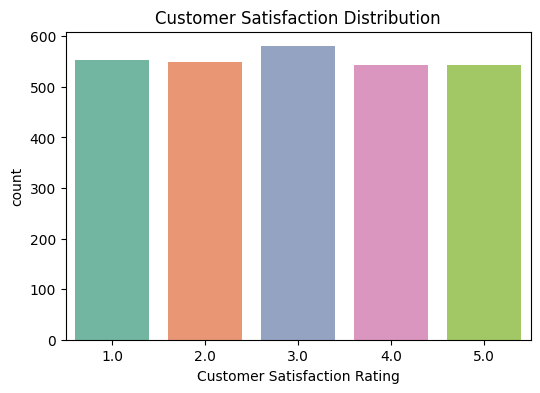

In [62]:
#  Exploratory Data Analysis (EDA)


# Distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Satisfaction Rating", data=df, palette="Set2")
plt.title("Customer Satisfaction Distribution")
plt.show()



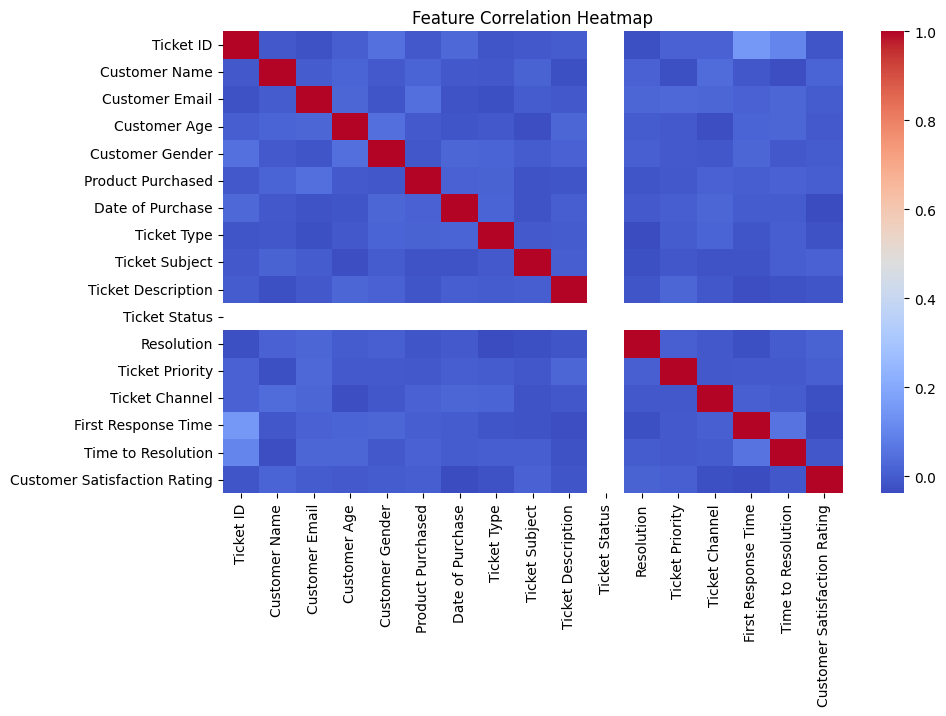

In [63]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


/tmp/ipython-input-943138648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Purchased", y="Customer Satisfaction Rating", data=df, palette="Blues")


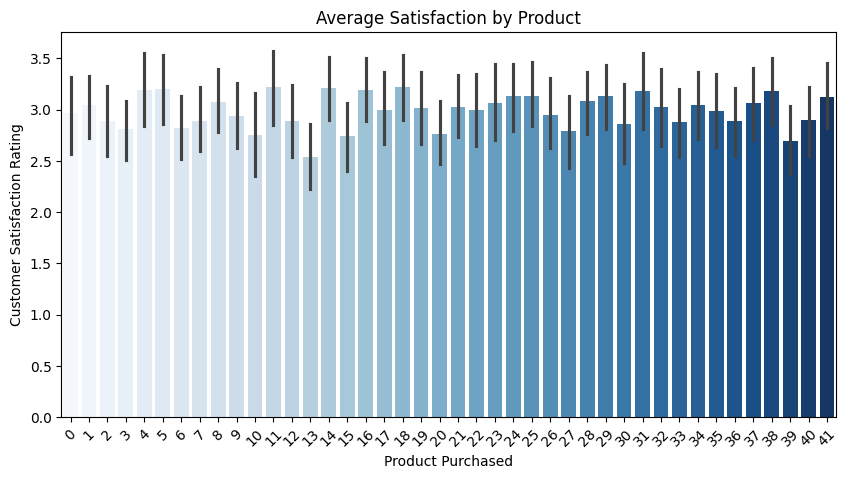

In [64]:
#Average satisfaction per product
plt.figure(figsize=(10,5))
sns.barplot(x="Product Purchased", y="Customer Satisfaction Rating", data=df, palette="Blues")
plt.title("Average Satisfaction by Product")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-240098362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Ticket Type", y="Customer Satisfaction Rating", data=df, palette="Set3")


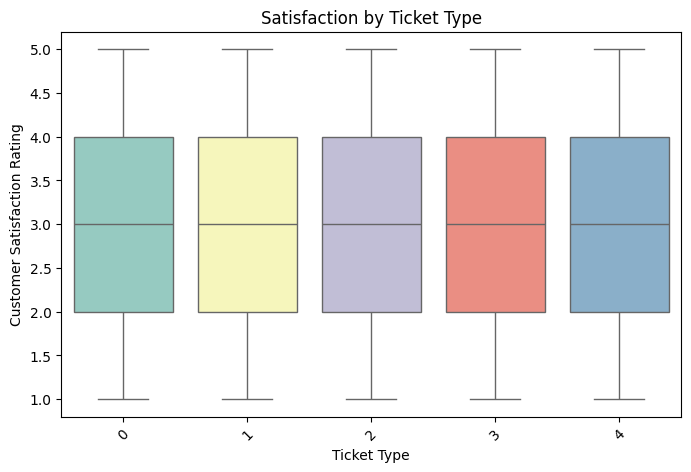

In [65]:
#  Satisfaction distribution by Ticket Type
plt.figure(figsize=(8,5))
sns.boxplot(x="Ticket Type", y="Customer Satisfaction Rating", data=df, palette="Set3")
plt.title("Satisfaction by Ticket Type")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-351524243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ticket Status", y="Customer Satisfaction Rating", data=df, palette="coolwarm")


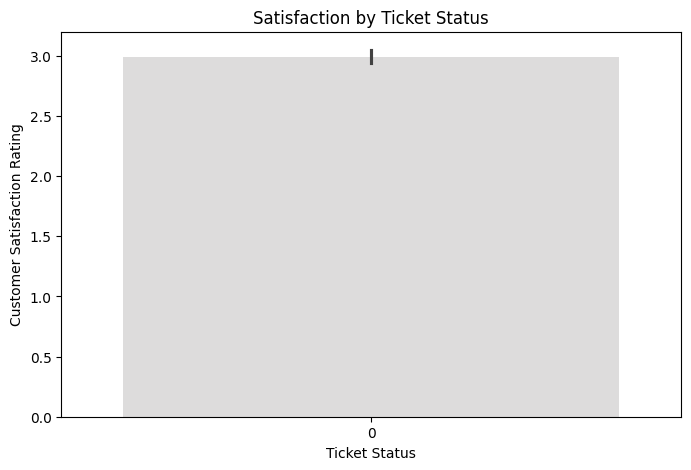

In [66]:
#Ticket Status vs Satisfaction
plt.figure(figsize=(8,5))
sns.barplot(x="Ticket Status", y="Customer Satisfaction Rating", data=df, palette="coolwarm")
plt.title("Satisfaction by Ticket Status")
plt.show()

/tmp/ipython-input-4068271386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Customer Gender", y="Customer Satisfaction Rating", data=df, palette="muted")


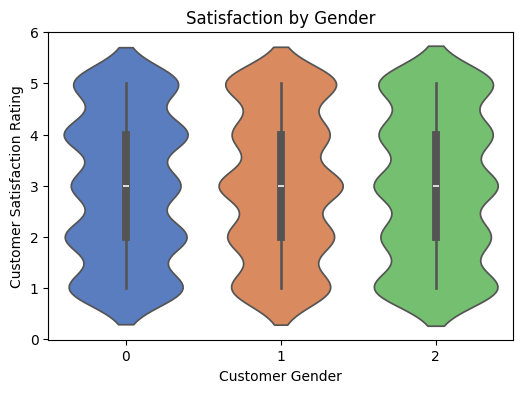

In [67]:
#  Gender-wise Satisfaction
plt.figure(figsize=(6,4))
sns.violinplot(x="Customer Gender", y="Customer Satisfaction Rating", data=df, palette="muted")
plt.title("Satisfaction by Gender")
plt.show()

/tmp/ipython-input-3598223747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ticket Channel", y="Customer Satisfaction Rating", data=df, palette="magma")


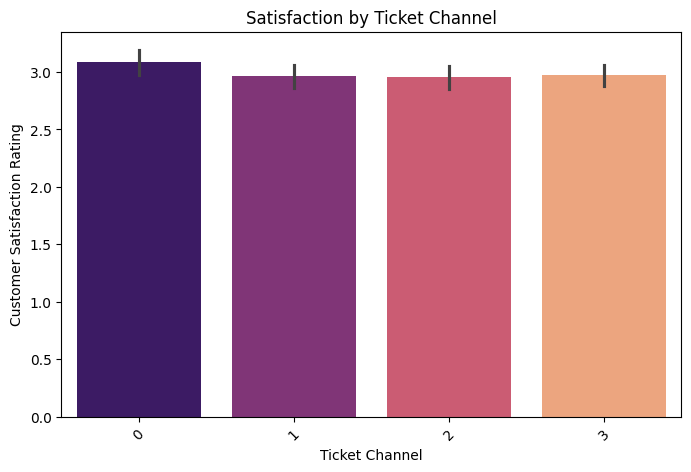

In [68]:
#  Channel used for Support vs Satisfaction
plt.figure(figsize=(8,5))
sns.barplot(x="Ticket Channel", y="Customer Satisfaction Rating", data=df, palette="magma")
plt.title("Satisfaction by Ticket Channel")
plt.xticks(rotation=45)
plt.show()

In [69]:
# Step 3: Feature Engineering


X = df.drop("Customer Satisfaction Rating", axis=1)
y = df["Customer Satisfaction Rating"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [70]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
#  Model Building


clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


Accuracy: 0.17689530685920576

Classification Report:
               precision    recall  f1-score   support

         1.0       0.14      0.14      0.14       111
         2.0       0.23      0.21      0.22       110
         3.0       0.17      0.19      0.18       116
         4.0       0.17      0.19      0.18       108
         5.0       0.18      0.15      0.16       109

    accuracy                           0.18       554
   macro avg       0.18      0.18      0.18       554
weighted avg       0.18      0.18      0.18       554



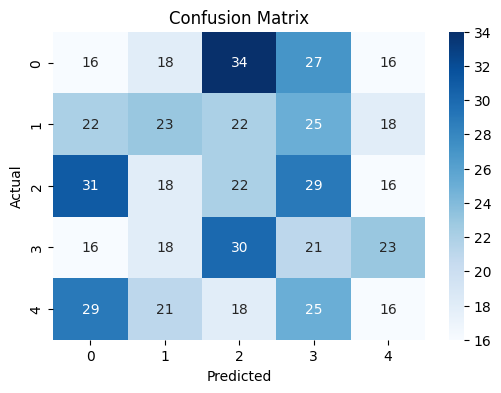

In [72]:
#  Model Evaluation
# -----------------------------------------------------------

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/tmp/ipython-input-1233160598.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")


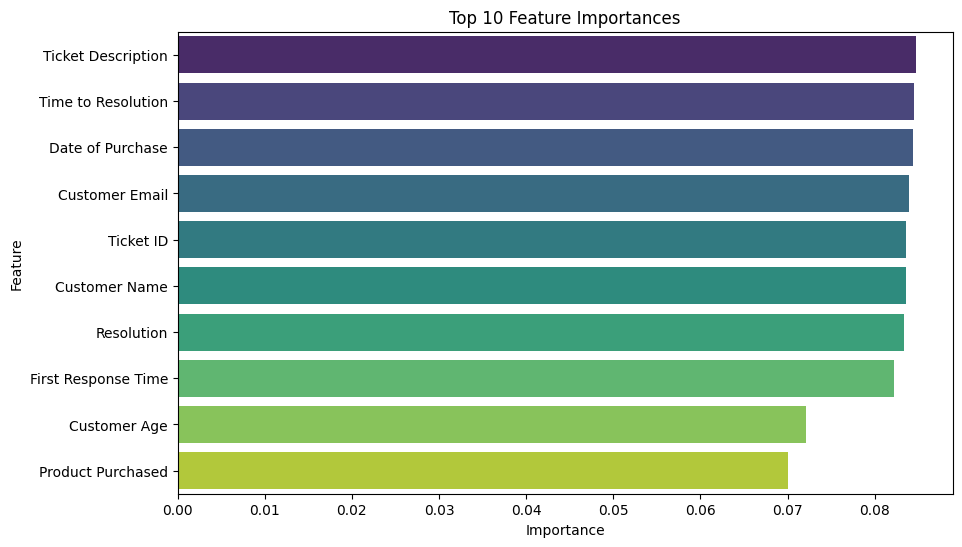

In [73]:
# Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()